In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [123]:
tests= pd.read_csv(r"D:\Documents D drive\SCI SCHOOLING\FINAL PROJECT\First Choice Data.csv")
df2= pd.read_excel(r"D:\Documents D drive\SCI SCHOOLING\FINAL PROJECT\DataR.xlsx")

In [135]:
df2.head()

,Education_Level,Prison_Offense,Prior_Arrest_Episodes_Drug,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Recidivism_Within_3years,Gender,Age_at_Release,Gang_Affiliated,Dependents
0,3,0,3,3,3,1,2,2,1,1,1,1,0,5,0.0,3
1,1,3,3,3,4,0,0,2,0,0,0,0,0,3,0.0,1
2,3,0,2,3,2,0,1,2,1,0,1,0,0,6,0.0,3
3,1,2,3,3,4,1,3,2,1,1,1,1,0,4,0.0,1
4,1,3,1,1,0,0,0,1,1,1,1,0,0,3,0.0,3


In [16]:
tests['Supervision_Level_First'].unique()

array(['Standard', 'Specialized', 'High', nan], dtype=object)

In [54]:
tests['Gang_Affiliated'].unique()

array([ 0., nan,  1.])

In [30]:
tests['Age_at_Release'].unique()

array(['43-47', '33-37', '48 or older', '38-42', '18-22', '23-27',
       '28-32'], dtype=object)

In [53]:
tests['Education_Level'].unique()

array([2, 0, 1], dtype=int64)

In [52]:
tests['Dependents'].unique()

array([3, 1, 0, 2], dtype=int64)

In [51]:
tests['Prison_Offense'].unique()

array(['Drug', 'Violent/Non-Sex', 'Property', nan, 'Other', 'Violent/Sex'],
      dtype=object)

In [132]:
cleanup= {"Supervision_Level_First":{"Standard": 0, "High":1, "Specialized":2},
         "Gang_Affiliated":{False:0, True:1,},
         "Age_at_Release":{"18-22":0, "23-27":1, "28-32":2, "33-37":3, "38-42":4, "43-47":5, "48 or older":6},
         "Prison_Offense":{"Property":0, "Other":1, "Drug":2, "Violent/Non-Sex":3, "Violent/Sex":4},
         "Education_Level":{"High School Diploma":1, "Less than HS diploma":0, "At least some college":2},
         "Dependents": {"0": 0, "1": 1, "2": 2, "3 or more": 3},
         "Gender": {"M":0, "F":1},
         "Employment_Exempt":{False:0, True:1,},
         "Recidivism_Within_3years":{False:0, True:1,},
         "Recidivism_Arrest_Year1":{False:0, True:1,},
         "Recidivism_Arrest_Year2":{False:0, True:1,},
         "Recidivism_Arrest_Year3":{False:0, True:1,}}

tests.replace(cleanup, inplace=True)

In [136]:
#tests=tests.drop(columns=['Prison_Years','Race', 'Training_Sample', 'ID', 'Residence_PUMA'])
#df2=df2.drop(columns=['Recidivism_Arrest_Year1','Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'])
#df2=df2.drop(columns=['Supervision_Risk_Score_First','Supervision_Level_First','Gang_Affiliated','Percent_Days_Employed'])

In [134]:
addT= tests[['Gender','Age_at_Release', 'Gang_Affiliated', 'Dependents']]
df2= df2.join(addT)

In [137]:
df2= df2.dropna()

In [138]:
X= df2.drop('Recidivism_Within_3years', axis=1).values
y= df2['Recidivism_Within_3years'].values
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .3)

In [139]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13990, 15) (13990,)
(5997, 15) (5997,)


In [140]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [141]:
predictions = lm.predict(x_test)
predictions

array([0.18230432, 0.47640331, 0.35879522, ..., 0.49496768, 0.46609725,
       0.5523624 ])

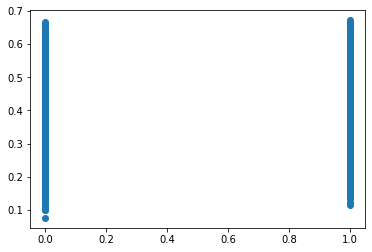

In [142]:
plt.scatter(y_test, predictions)

In [143]:
print("Score:", lm.score(x_test, y_test))

Score: 0.045605727742359825


In [144]:
kfold = KFold(n_splits = 5,shuffle = True, random_state = 1)
for train, test in kfold.split(X,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 19984 19985 19986], test: [    4     5     6 ... 19970 19977 19981]
train: [    1     2     3 ... 19984 19985 19986], test: [    0     8    12 ... 19962 19964 19979]
train: [    0     1     2 ... 19981 19983 19985], test: [   16    21    24 ... 19982 19984 19986]
train: [    0     4     5 ... 19984 19985 19986], test: [    1     2     3 ... 19978 19980 19983]
train: [    0     1     2 ... 19983 19984 19986], test: [   14    15    18 ... 19948 19973 19985]


In [145]:
print(cross_val_score(lm, X,y, cv=3))

[0.04396115 0.04111204 0.04905077]
